# MOwNiT 
## Laboratorium
## Wybrane zagadnienia algebry liniowej, faktoryzacja
### Algebra liniowa w Julii
https://docs.julialang.org/en/v1.2/stdlib/LinearAlgebra/index.html

In [2]:
using(LinearAlgebra)

In [2]:
methods(factorize)

# 11 methods for generic function "factorize":
[1] factorize(A::StridedArray{T, 2}) where T in LinearAlgebra at C:\Users\Piotrek\AppData\Local\Programs\Julia 1.5.3\share\julia\stdlib\v1.5\LinearAlgebra\src\dense.jl:1207
[2] factorize(A::Adjoint) in LinearAlgebra at C:\Users\Piotrek\AppData\Local\Programs\Julia 1.5.3\share\julia\stdlib\v1.5\LinearAlgebra\src\dense.jl:1283
[3] factorize(A::Transpose) in LinearAlgebra at C:\Users\Piotrek\AppData\Local\Programs\Julia 1.5.3\share\julia\stdlib\v1.5\LinearAlgebra\src\dense.jl:1284
[4] factorize(A::LinearAlgebra.AbstractTriangular) in LinearAlgebra at C:\Users\Piotrek\AppData\Local\Programs\Julia 1.5.3\share\julia\stdlib\v1.5\LinearAlgebra\src\triangular.jl:2676
[5] factorize(A::Union{Hermitian{Complex{Float64},var"#s828"}, Hermitian{Float64,var"#s828"}, Symmetric{Float64,var"#s828"}} where var"#s828"<:SparseArrays.AbstractSparseMatrixCSC) in SparseArrays at C:\Users\Piotrek\AppData\Local\Programs\Julia 1.5.3\share\julia\stdlib\v1.5\SparseArrays\src\linalg.jl:1538
[6] factorize(A::Union{Hermitian{T,S}, Symmetric{T,S}} where S where T) in LinearAlgebra at C:\Users\Piotrek\AppData\Local\Programs\Julia 1.5.3\share\julia\stdlib\v1.5\LinearAlgebra\src\symmetric.jl:634
[7] factorize(A::Tridiagonal) in LinearAlgebra at C:\Users\Piotrek\AppData\Local\Programs\Julia 1.5.3\share\julia\stdlib\v1.5\LinearAlgebra\src\lu.jl:555
[8] factorize(D::Diagonal) in LinearAlgebra at C:\Users\Piotrek\AppData\Local\Programs\Julia 1.5.3\share\julia\stdlib\v1.5\LinearAlgebra\src\diagonal.jl:121
[9] factorize(A::Bidiagonal) in LinearAlgebra at C:\Users\Piotrek\AppData\Local\Programs\Julia 1.5.3\share\julia\stdlib\v1.5\LinearAlgebra\src\bidiag.jl:875
[10] factorize(S::SymTridiagonal) in LinearAlgebra at C:\Users\Piotrek\AppData\Local\Programs\Julia 1.5.3\share\julia\stdlib\v1.5\LinearAlgebra\src\ldlt.jl:166
[11] factorize(A::SparseArrays.AbstractSparseMatrixCSC) in SparseArrays at C:\Users\Piotrek\AppData\Local\Programs\Julia 1.5.3\share\julia\stdlib\v1.5\SparseArrays\src\linalg.jl:1508

In [3]:
# wiersze vs kolumny
x1 = [1 2 2]

1×3 Array{Int64,2}:
 1  2  2

In [4]:
y1 = [1 ;2 ;3]

3-element Array{Int64,1}:
 1
 2
 3

In [5]:
transpose(x1)

3×1 Transpose{Int64,Array{Int64,2}}:
 1
 2
 2

In [6]:
# iloczyn skalarny
dot(x1, y1)

11

 Długość wektora liczymy jako pierwiastek z jego iloczynu skalarnego 
$$ \lVert\mathbf{v}\rVert = \sqrt{\mathbf{v}\cdot \mathbf{v}}=\sqrt{\sum_{i=1}^nv_i^2}$$



#### Przykładowe dane

In [7]:
# losujemy macierz 3x3
A = rand(3,3)

3×3 Array{Float64,2}:
 0.899971  0.86987   0.22382
 0.159068  0.567359  0.00395391
 0.183727  0.526733  0.172389

In [8]:
# losujemy wektor x
x = rand(3)

3-element Array{Float64,1}:
 0.7178431317948228
 0.65795017693524
 0.6656441293945998

In [9]:
# wyliczamy b
b = A*x

3-element Array{Float64,1}:
 1.367354323537614
 0.4901113712208542
 0.5932014322080087

### Sposoby rozwiązania Ax=b

In [10]:
# mozemy policzyc odwrotność macierzy i wymnożyć
# uwaga: nieefektywne!
inv(A) * b

3-element Array{Float64,1}:
 0.7178431317948226
 0.65795017693524
 0.6656441293945998

In [11]:
# najlepiej używać zoptymalizowanego operatora "\""
x = A\b

3-element Array{Float64,1}:
 0.7178431317948226
 0.6579501769352402
 0.6656441293946

 operator "\\" wybiera odpowiednią faktoryzację:
- https://docs.julialang.org/en/v1.2/stdlib/LinearAlgebra/#LinearAlgebra.factorize
- https://docs.julialang.org/en/v1.2/stdlib/LinearAlgebra/#man-linalg-factorizations-1
 


### Faktoryzacja LU

In [12]:
# W przypadku ogólnej macierzy kwadratowej jest to faktoryzacja LU z pivotem
Af = factorize(A)

LU{Float64,Array{Float64,2}}
L factor:
3×3 Array{Float64,2}:
 1.0       0.0       0.0
 0.176748  1.0       0.0
 0.204148  0.844152  1.0
U factor:
3×3 Array{Float64,2}:
 0.899971  0.86987    0.22382
 0.0       0.413611  -0.0356059
 0.0       0.0        0.156754

In [13]:
# Macierz L
Af.L

3×3 Array{Float64,2}:
 1.0       0.0       0.0
 0.176748  1.0       0.0
 0.204148  0.844152  1.0

In [14]:
# Macierz U
Af.U

3×3 Array{Float64,2}:
 0.899971  0.86987    0.22382
 0.0       0.413611  -0.0356059
 0.0       0.0        0.156754

In [18]:
# wektor permutacji wierszy 
Af.p

3-element Array{Int64,1}:
 1
 2
 3

In [16]:
# sprawdzenie czy dostaniemy pierwotna macierz
Af.P * A - Af.L*Af.U

3×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [19]:
# mozemy zamienic macierz A na postać zfaktoryzowaną
A = factorize(A)

LU{Float64,Array{Float64,2}}
L factor:
3×3 Array{Float64,2}:
 1.0       0.0       0.0
 0.176748  1.0       0.0
 0.204148  0.844152  1.0
U factor:
3×3 Array{Float64,2}:
 0.899971  0.86987    0.22382
 0.0       0.413611  -0.0356059
 0.0       0.0        0.156754

In [20]:
# i działać na niej operatorem \
# operator ten będzie wykorzytywał raz utworzony wynik faktoryzacji
A\b

3-element Array{Float64,1}:
 0.7178431317948226
 0.6579501769352402
 0.6656441293946

In [21]:
# dla różnych prawych stron równania z tą samą macierzą
c = rand(3);
A\c

3-element Array{Float64,1}:
 -0.5366394225668646
  1.8261382257968783
 -0.6762589752270634

### Faktoryzacja QR


In [22]:
B = rand(10, 5)

10×5 Array{Float64,2}:
 0.0568935  0.0875996  0.334551   0.41377   0.735346
 0.490199   0.206696   0.774178   0.018011  0.391085
 0.708714   0.658433   0.757815   0.584545  0.950053
 0.481661   0.840763   0.602065   0.718781  0.786913
 0.128453   0.134845   0.0223073  0.710962  0.556659
 0.339261   0.458413   0.57314    0.386889  0.556076
 0.98694    0.798721   0.569266   0.743248  0.320126
 0.6052     0.378634   0.87735    0.268454  0.725498
 0.746679   0.104029   0.903071   0.297582  0.840885
 0.837184   0.226145   0.237276   0.355847  0.260392

In [277]:
# W przypadku ogólnej macierzy prostokątnej wybierana jest faktoryzacja QR z pivotem
qrf = factorize(B)

QRPivoted{Float64,Array{Float64,2}}
Q factor:
10×10 LinearAlgebra.QRPackedQ{Float64,Array{Float64,2}}:
 -0.357186   0.417627     0.149081    0.143604   …  -0.56371     -0.193404
 -0.189965  -0.170621     0.144185   -0.530077      -0.360061    -0.0487845
 -0.461478  -0.00282184  -0.145339    0.111816       0.183645    -0.609762
 -0.382234   0.0876222   -0.573288    0.0280935      0.0947439    0.568797
 -0.270391   0.243238     0.0737091   0.535337       0.0921867    0.0348739
 -0.270108   0.0628639   -0.226754   -0.204326   …   0.0114417    0.115421
 -0.155498  -0.639764    -0.360821    0.0666384      0.00251776  -0.320541
 -0.352403  -0.0568018    0.0912292  -0.329402      -0.203592     0.164893
 -0.40845   -0.104452     0.574563   -0.138846       0.579439     0.129066
 -0.126482  -0.549763     0.28586     0.473861      -0.352207     0.322092
R factor:
5×5 Array{Float64,2}:
 -2.05872  -1.52859  -1.18478   -1.80382    -1.36918
  0.0      -1.17113  -0.532946  -0.539106   -0.289152
  0.0 

- $Q$ to macierz  ortogonalna mxm, co oznacza, że  $Q^T*Q=Q*Q^T=I$ czyli $Q^{-1}=Q^T$ (odwracanie takich macierzy jest szybkie i nie generuje dodatkowych błędów !)
- $R$ to macierz postaci $\begin{pmatrix} Rfactor \\ 0 \end{pmatrix} $ , gdzie $Rfactor$ jest macierzą trójkątną górną, a 0 to macierz zer o wymierze nx(m-n)

In [24]:
# sprawdzenie macierzy Q
transpose(qrf.Q)*qrf.Q

10×10 Array{Float64,2}:
  1.0           1.66533e-16   4.16334e-17  …  -2.08167e-16  -6.245e-17
  1.66533e-16   1.0          -2.77556e-17      8.32667e-17   5.55112e-17
  4.16334e-17  -2.77556e-17   1.0              6.93889e-17  -8.32667e-17
  7.63278e-17   0.0          -2.77556e-17      1.11022e-16   1.94289e-16
  4.16334e-17   0.0           1.52656e-16     -9.71445e-17  -1.11022e-16
 -4.51028e-17  -1.38778e-17  -3.46945e-17  …   5.55112e-17   6.93889e-17
  2.5327e-16   -1.17961e-16  -1.14492e-16      1.2837e-16    2.42861e-17
 -1.66533e-16   0.0           3.1225e-17      -4.51028e-17   1.73472e-17
 -2.08167e-16   8.32667e-17   6.93889e-17      1.0          -1.38778e-17
 -6.245e-17     5.55112e-17  -8.32667e-17     -1.38778e-17   1.0

In [27]:
isapprox(transpose(qrf.Q)*qrf.Q, I)

true

In [28]:
qrf.R

5×5 Array{Float64,2}:
 -2.05872  -1.52859  -1.18478   -1.80382    -1.36918
  0.0      -1.17113  -0.532946  -0.539106   -0.289152
  0.0       0.0      -0.758077   0.0392208  -0.439055
  0.0       0.0       0.0       -0.629864    0.525383
  0.0       0.0       0.0        0.0        -0.312433

### Zastosowanie faktoryzacji do metody najmniejszych kwadratów

Jednym z zastosowań faktoryzacji QR jest użycie jej do metody najmniejszych kwadratów.

Przykład:

Obliczmy dopasowanie wielomianu $$f(x)=wsp_2*x^2+wsp_1*x+wsp_0$$ do punktów (1,1) (2,2) (3,4) (4, 4) (5,3) (6,0)

- Budujemy układ równań wg wzoru $$wsp_2x_i^2+wsp_1x_i+wsp_0=y_i$$:
$$wsp_2*1^2+wsp_1*1+wsp_0=1$$
$$wsp_2*2^2+wsp_1*2+wsp_0=2$$
$$wsp_2*3^2+wsp_1*3+wsp_0=4$$
$$wsp_2*4^2+wsp_1*4+wsp_0=4$$
$$wsp_2*5^2+wsp_1*5+wsp_0=3$$
$$wsp_2*6^2+wsp_1*6+wsp_0=0$$

- Układ ten  nie ma dokładnego rozwiązania. Możemy jednak znaleźć najlepsze przybliżenie, czyli takie $wsp_i$, które minimalizują odległość:

$$\sqrt{\sum_{i=1}^{6}{(y_i-f(x_i))^2}}=\lVert y-A*wsp\rVert$$





Jak użyć do tej mimalizacji faktoryzacji QR:

#### 1. Tworzymy macierz A na postawie $(x_i,y_i)$

In [29]:
A = zeros(6,3) 

6×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

 punkty $(x_i,y_i)$


In [30]:
x=[1; 2; 3; 4; 5; 6]
y=[1; 2; 4; 4; 3; 0]

6-element Array{Int64,1}:
 1
 2
 4
 4
 3
 0

In [31]:
A[:,1] = x.^2

6-element Array{Int64,1}:
  1
  4
  9
 16
 25
 36

In [32]:
A[:,2] = x

6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6

In [33]:
A[:,3] = ones(6)

6-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [34]:
A

6×3 Array{Float64,2}:
  1.0  1.0  1.0
  4.0  2.0  1.0
  9.0  3.0  1.0
 16.0  4.0  1.0
 25.0  5.0  1.0
 36.0  6.0  1.0

#### 2. Dokonujemy faktoryzacji QR macierzy A 

In [35]:
AF = factorize(A)

QRPivoted{Float64,Array{Float64,2}}
Q factor:
6×6 LinearAlgebra.QRPackedQ{Float64,Array{Float64,2}}:
 -0.0209657  -0.343313    0.838525   0.112335    -0.0400677  -0.405397
 -0.0838628  -0.521522    0.167705  -0.00636667   0.34634     0.756879
 -0.188691   -0.534625   -0.223607  -0.612934    -0.487947   -0.121617
 -0.335451   -0.382624   -0.33541    0.753648    -0.213523   -0.122449
 -0.524142   -0.0655178  -0.167705  -0.204705     0.705864   -0.390779
 -0.754765    0.416693    0.279508  -0.0419783   -0.310667    0.283364
R factor:
3×3 Array{Float64,2}:
 -47.697  -9.24587  -1.90788
   0.0    -2.34816  -1.43091
   0.0     0.0       0.559017
permutation:
3-element Array{Int64,1}:
 1
 2
 3

In [36]:
# można przetestować ortogonalność:
Transpose(AF.Q)*AF.Q

6×6 Array{Float64,2}:
  1.0           0.0           1.11022e-16  …   8.32667e-17   0.0
  0.0           1.0           9.71445e-17     -5.55112e-17  -1.249e-16
  1.11022e-16   9.71445e-17   1.0             -4.16334e-17   0.0
 -9.71445e-17   3.46945e-17   2.60209e-17     -9.88792e-17  -2.08167e-17
  8.32667e-17  -5.55112e-17  -4.16334e-17      1.0           0.0
  0.0          -1.249e-16     0.0          …   0.0           1.0

Mamy równanie:
$$A*wsp=y$$
Dla $A=QR$:
$$QR*wsp =y$$
Możemy obydwie strony wymnożyć z lewej przez $Q^T$:
$$R*wsp =Q^T y$$
$$\begin{pmatrix} Rfactor \\ 0 \end{pmatrix} wsp= Q^T y$$

Poszukiwanym rozwiązaniem jest rozwiązanie równania będącego górną niezerową częścią:
$$Rfactor * wsp= Q^T y[1:n]$$
$$wsp=Rfactor \setminus Q^T y[1:n]$$

In [37]:
# implementacja powyższego (uwaga: w tym przykladzie nie jest potrzebna permutacja,
# bo wektor permutacji wynosi[1 2 3])
AF.R\((Transpose(AF.Q)*y)[1:3])

3-element Array{Float64,1}:
 -0.5714285714285725
  3.9428571428571515
 -2.8000000000000163

Więcej informacji:
- http://www.math.uconn.edu/~leykekhman/courses/MATH3795/Lectures/Lecture_8_Linear_least_squares_orthogonal_matrices.pdf
- http://www.seas.ucla.edu/~vandenbe/133A/lectures/qr.pdf

W praktyce używamy tego algorytmu poprzez operator "\\", za którym jest on "schowany".

In [38]:
A \ y

3-element Array{Float64,1}:
 -0.5714285714285726
  3.942857142857151
 -2.8000000000000145

In [39]:
# sprawdzamy czy dostaliśmy dobre wspólczynniki
using Polynomials
fit(x, y, 2)

Polynomial(-2.8 + 3.9428571428571417*x - 0.5714285714285711*x^2)

In [40]:
@which fit

Polynomials

Funkcja <a href="https://github.com/JuliaMath/Polynomials.jl/blob/master/src/common.jl#L142">
fit</a>  z pakietu Polynomials używa własnie tej metody


### Zadania

#### Zadanie 1 (1pkt)
Ustal losowe (referencyjne) x rozmiaru 1000 oraz losowe A rozmiaru 1000x1000, policz b=A*x.
Nastepnie rozwiąż równanie Ax=b trzema metodami:
- inv()
- \
- factorize()

Porównaj jakość wyniku (zmierzoną jako długość różnicy wektorów wyniku oraz referencyjnego x) oraz czas wykonania (@time). UWAGA: pierwsze wykonanie funkcji w Julii zawiera czas kompilacji tej funkcji, dlatego czas mierzymy  od drugiego wywołania !

#### Zadanie 2 (1pkt)
Policz współczynniki wielomianu aproksymującego dowolne dane z poprzednich laboratoriów tworząc wprost układ równań i rozwiązujac go (metoda z użyciem faktoryzacji QR zaprezentowana na tym laboratorium).
Porównaj wyniki z tymi otrzymanymi poprzednio.

#### Zadanie 3 (2 pkt)

Znajdź i zaprezentuj działanie innego zastosowania wybranej faktoryzacji. Przykładowe (ale nie jedyne!) tematy:

-    tworzenie pseudoinversji macierzy (http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-macausland-pseudo-inverse-present.pdf).

-   uzycie faktoryzacji QR do znajdowania wartości własnych (https://en.wikipedia.org/wiki/QR_algorithm)

-  zastosowanie faktoryzacji SVD - przykład zastosowania w uczeniu maszynowym https://blog.statsbot.co/singular-value-decomposition-tutorial-52c695315254




#### Zadanie 1

In [8]:
using Polynomials
using Plots
using Statistics
using LinearAlgebra

In [9]:
A = rand(1000, 1000)
x = rand(1000)
b = A*x;
x2 = A \ b;
factorize(A) \ b;

In [21]:
means = []
for i in 1:10
    push!(means, @elapsed  x1 = inv(A) * b)
end
print(mean(means))

0.0704729803

In [22]:
means = []
for i in 1:10
    push!(means, @elapsed  x2 = A \ b)
end
print(mean(means))

0.031233490000000003

In [23]:
means = []
for i in 1:10
    push!(means, @elapsed factorize(A) \ b)
end
print(mean(means))

0.0322129898

#### Zadanie 2

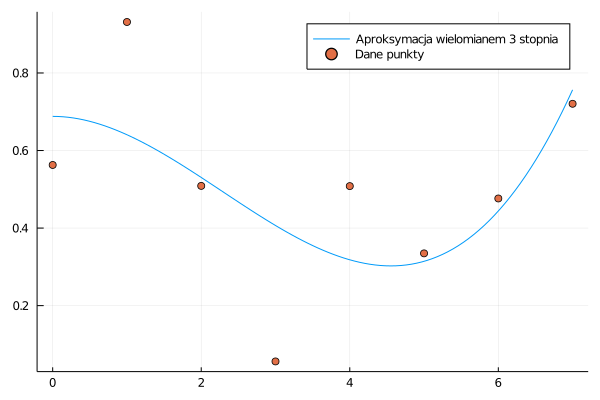

In [184]:
xs = 0:7
ys = rand(8, 1)[:]

fit_poly_3 = fit(xs, ys, 3)
plot(fit_poly_3,  extrema(xs)..., label="Aproksymacja wielomianem 3 stopnia")
scatter!(xs, ys, label ="Dane punkty")

In [250]:
fit_poly_3.coeffs

4-element Array{Float64,1}:
  0.6880695975291264
  0.0004152753082885059
 -0.055967627940892536
  0.008186584333421234

In [187]:
A = zeros(8,4) 
A[:,1] = xs.^3
A[:,2] = xs.^2
A[:,3] = xs
A[:,4] = ones(8)
A

8×4 Array{Float64,2}:
   0.0   0.0  0.0  1.0
   1.0   1.0  1.0  1.0
   8.0   4.0  2.0  1.0
  27.0   9.0  3.0  1.0
  64.0  16.0  4.0  1.0
 125.0  25.0  5.0  1.0
 216.0  36.0  6.0  1.0
 343.0  49.0  7.0  1.0

In [249]:
AF = factorize(A)

w = (AF.R\((Transpose(AF.Q)*ys)[1:4]))[AF.p]
w = reverse(w)

4-element Array{Float64,1}:
  0.6880695975291273
  0.00041527530828813254
 -0.055967627940892446
  0.008186584333421225

In [253]:
fit_poly_3.coeffs - w

4-element Array{Float64,1}:
 -8.881784197001252e-16
  3.7334501809538345e-16
 -9.020562075079397e-17
  8.673617379884035e-18

#### Zadanie 3

Znajdowanie wartości własnych

In [66]:
M = rand(50,50)
M += Transpose(M)

50×50 Array{Float64,2}:
 1.18082   1.67945   1.54676   0.174269  …  0.162976  0.78983    1.6089
 1.67945   1.99162   0.684139  0.890548     1.07718   0.392589   0.572907
 1.54676   0.684139  1.28673   0.720526     1.48411   0.594441   0.927121
 0.174269  0.890548  0.720526  1.47148      1.34666   0.388263   0.996042
 1.56157   0.272826  1.28216   1.50242      1.05796   0.519985   0.649504
 0.816764  1.00528   1.06473   1.33312   …  1.0078    0.937143   0.541669
 1.33229   1.38726   1.63347   1.06649      0.920345  0.362497   1.03702
 1.35422   0.934693  1.0186    1.33897      1.31058   0.731701   1.20136
 1.0864    1.54376   1.05949   1.56483      1.36612   0.943021   1.42634
 1.42691   1.48871   1.30035   0.723338     0.987757  1.72566    1.72731
 1.05412   1.00209   0.477459  0.977288  …  1.06241   1.25356    1.367
 1.58153   1.33065   0.950344  0.798415     1.72862   1.45608    0.8185
 1.49718   0.693548  0.792059  0.358428     0.393596  0.644049   1.04309
 ⋮                        

In [73]:
m_eigvals = eigvals(M)

50-element Array{Float64,1}:
 -5.675210603552012
 -4.879834690389623
 -4.708214067016242
 -4.405046682587527
 -4.099962161498494
 -3.8315010855725986
 -3.691296132952426
 -3.5140465054409353
 -3.34763489794596
 -3.235448293824896
 -2.7477079258343533
 -2.7025983696833
 -2.4639534756845505
  ⋮
  2.936767475334779
  3.075648408048391
  3.173772039627985
  3.422395968439528
  3.5126160226934706
  3.7979278912621317
  4.12962728717296
  4.3609189257565735
  4.71702858962183
  4.958798749395962
  5.926474820690268
 49.91484702068908

In [74]:
X = M
for i in 1:10000
    X = qr(X).R * qr(X).Q
end

In [75]:
qr_eigvals = sort(diag(X))

50-element Array{Float64,1}:
 -5.6752106035519985
 -4.879834690389581
 -4.708214067016126
 -4.405046682587479
 -4.099962161498465
 -3.831501085572618
 -3.6912961329523855
 -3.5138284749979105
 -3.347634897945944
 -3.235448293824905
 -2.7477079258343156
 -2.7025983696832965
 -2.463953475684553
  ⋮
  2.936767475334787
  3.0756484080483766
  3.1737720396279427
  3.422395968439516
  3.512397992250346
  3.797927891262113
  4.129627287173022
  4.360918925756571
  4.717028589621642
  4.958798749395947
  5.926474820690306
 49.914847020689145

In [76]:
qr_eigvals - m_eigvals

50-element Array{Float64,1}:
  1.3322676295501878e-14
  4.1744385725905886e-14
  1.163513729807164e-13
  4.884981308350689e-14
  2.930988785010413e-14
 -1.9539925233402755e-14
  4.04121180963557e-14
  0.00021803044302481922
  1.5987211554602254e-14
 -9.325873406851315e-15
  3.774758283725532e-14
  3.552713678800501e-15
 -2.6645352591003757e-15
  ⋮
  7.993605777301127e-15
 -1.4210854715202004e-14
 -4.218847493575595e-14
 -1.199040866595169e-14
 -0.0002180304431247393
 -1.865174681370263e-14
  6.217248937900877e-14
 -2.6645352591003757e-15
 -1.8740564655672642e-13
 -1.509903313490213e-14
  3.730349362740526e-14
  6.394884621840902e-14